<a href="https://colab.research.google.com/github/Mohammad-Faseeh-Ul-Hassan/AI-LAB-ASSIGNMENT-2/blob/main/LAB_ASSIG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Member**

*   Mohammad Faseeh Ul Hassan
*   Haseeb Bhatti
*   Huzaifa Saad
*   Hasnain Khan
*   Zahid Rehmat


#**Lab Assignment:2**






#Task 1
a. Constraint Satisfaction Implement the Backtracking algorithm to solve the Australian Map Coloring problem

In [ ]:
class Constraint:
    def __init__(self, variables):
        self.variables = variables

    def satisfied(self, assignment):
        raise NotImplementedError("This method should be overridden in subclasses.")

class MapColoringConstraint(Constraint):
    def __init__(self, place1, place2):
        super().__init__([place1, place2])
        self.place1 = place1
        self.place2 = place2

    def satisfied(self, assignment):
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        return assignment[self.place1] != assignment[self.place2]

class CSP:
    def __init__(self, variables, domains):
        self.variables = variables
        self.domains = domains
        self.constraints = {}

        for variable in self.variables:
            self.constraints[variable] = []

    def add_constraint(self, constraint):
        for variable in constraint.variables:
            if variable not in self.variables:
                raise ValueError("Variable in constraint not in CSP")
            self.constraints[variable].append(constraint)

    def consistent(self, variable, assignment):
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True

    def backtracking_search(self, assignment={}):
        if len(assignment) == len(self.variables):
            return assignment

        unassigned = [v for v in self.variables if v not in assignment]
        first = unassigned[0]
        for value in self.domains[first]:
            local_assignment = assignment.copy()
            local_assignment[first] = value
            if self.consistent(first, local_assignment):
                result = self.backtracking_search(local_assignment)
                if result is not None:
                    return result
        return None

variables = ["Western Australia", "Northern Territory", "South Australia",
             "Queensland", "New South Wales", "Victoria", "Tasmania"]
domains = {}
for variable in variables:
    domains[variable] = ["red", "green", "blue"]

csp = CSP(variables, domains)
csp.add_constraint(MapColoringConstraint(
    "Western Australia", "Northern Territory"))
csp.add_constraint(MapColoringConstraint(
    "Western Australia", "South Australia"))
csp.add_constraint(MapColoringConstraint(
    "South Australia", "Northern Territory"))
csp.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
csp.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
csp.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
csp.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
csp.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
csp.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
csp.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))

solution = csp.backtracking_search()
if solution is None:
    print("No solution found!")
else:
    print(solution)

{'Western Australia': 'red', 'Northern Territory': 'green', 'South Australia': 'blue', 'Queensland': 'red', 'New South Wales': 'green', 'Victoria': 'red', 'Tasmania': 'green'}


#**Task 2**
a. Supervised Machine Learning with KNN
Implement the k-Nearest Neighbors (KNN) algorithm for
supervised learning. Use Scikit-learn to implement the KNN algorithm for classification tasks. Evaluate the performance of the KNN model on your choice datasets.

**Step-1**
**Load and Explore the Dataset**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('/content/drive/MyDrive/dataset/affirmative_asylum dataset.csv')

print(dataset.info())
print(dataset.head())

label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

print(dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Continent/Country of Nationality  109 non-null    object
 1   2006                              109 non-null    object
 2   2007                              109 non-null    object
 3   2008                              109 non-null    object
 4   2009                              109 non-null    object
 5   2010                              109 non-null    object
 6   2011                              109 non-null    object
 7   2012                              109 non-null    object
 8   2013                              109 non-null    object
 9   2014                              109 non-null    object
 10  2015                              109 non-null    object
dtypes: object(11)
memory usage: 9.5+ KB
None
  Continent/Country of Nationality   2006  

**Step-2**
**Split the Data**

In [25]:
X = dataset.drop("2009", axis=1)
y = dataset["2009"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step-3**
**Implement the KNN Algorithm**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


**Step-4**
**Evaluate the Performance**

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.09090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          31       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**b. Clustering with K-means:**
Apply the K-means clustering algorithm for unsupervised learning. Use Scikit-learn to implement the K-means algorithm for clustering data points. Visualize and analyze the clustered data to gain insights.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


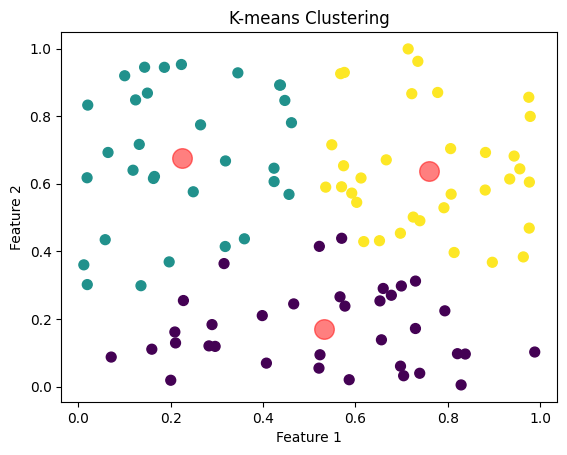

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


np.random.seed(0)
X = np.random.rand(100, 2)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


**c. Implementation of Gradient Descent**
Implement gradient descent for linear regression to find the best-fitting line. Apply gradient descent to optimize the logistic regression model for binary classification.

Optimized theta: [[4.22215108]
 [2.96846751]]


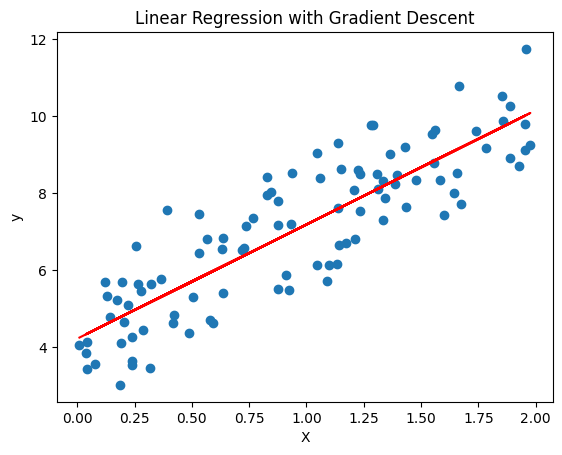

In [27]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


X_b = np.c_[np.ones((100, 1)), X]

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)


for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


print("Optimized theta:", theta)

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.show()


**d. Data Normalization and Scaling**
Implement data normalization and scaling techniques to preprocess datasets. Observe the impact of preprocessing on the performance of machine learning algorithms.

**Step:1**
Load Dataset

In [39]:
import numpy as np
import pandas as pd

np.random.seed(0)
data = {
    'Per-continent': np.random.randint(100, 1000, 10),
    'Country': np.random.randint(1, 100, 10)
}
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)


Original Dataset:
   Per-continent  Country
0            784       22
1            659       37
2            729       88
3            292       71
4            935       89
5            863       89
6            807       13
7            459       59
8            109       66
9            823       40


**Step:2**
Normalization and Scaling techniques

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaling
scaler_minmax = MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=df.columns)
print("\nScaled Dataset:")
print(df_minmax)

# normalization
scaler_standard = StandardScaler()
df_standard = scaler_standard.fit_transform(df)
df_standard = pd.DataFrame(df_standard, columns=df.columns)
print("\nNormalized Dataset:")
print(df_standard)



Scaled Dataset:
   Per-continent   Country
0       0.817191  0.118421
1       0.665860  0.315789
2       0.750605  0.986842
3       0.221550  0.763158
4       1.000000  1.000000
5       0.912833  1.000000
6       0.845036  0.000000
7       0.423729  0.605263
8       0.000000  0.697368
9       0.864407  0.355263

Normalized Dataset:
   Per-continent   Country
0       0.536103 -1.324960
1       0.050502 -0.763536
2       0.322439  1.145305
3      -1.375220  0.509024
4       1.122708  1.182733
5       0.843002  1.182733
6       0.625453 -1.661814
7      -0.726458  0.059885
8      -2.086139  0.321883
9       0.687610 -0.651252


**e. Basic Convolution Neural Networks Implement basic Convolutional Neural Networks (CNNs) using Keras**

In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

np.random.seed(0)
train_images = np.random.rand(100, 28, 28, 3)
train_labels = np.random.randint(0, 2, 100)
test_images = np.random.rand(20, 28, 28, 3)
test_labels = np.random.randint(0, 2, 20)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=16, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/5
7/7 [==============================] - 2s 56ms/step - loss: 0.7067 - accuracy: 0.5500 - val_loss: 0.7250 - val_accuracy: 0.2500
Epoch 2/5
7/7 [==============================] - 0s 23ms/step - loss: 0.6881 - accuracy: 0.5500 - val_loss: 0.7598 - val_accuracy: 0.2500
Epoch 3/5
7/7 [==============================] - 0s 25ms/step - loss: 0.7075 - accuracy: 0.5500 - val_loss: 0.7756 - val_accuracy: 0.2500
Epoch 4/5
7/7 [==============================] - 0s 22ms/step - loss: 0.6846 - accuracy: 0.5700 - val_loss: 0.6953 - val_accuracy: 0.4000
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 0.6981 - accuracy: 0.3500
Test accuracy: 0.3499999940395355
